## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?

*Regression is using characteristics to predict a numeric value, while classification is predicting a categorical value or class label.*

2. What is a confusion table? What does it help us understand about a model's performance?

*A confusion table cross tabulates how close our prediction values were to the true values. It essentially tells us how accurate our model performs.*

3. Define accuracy. Can an accurate model be flawed for practical use? Explain.

*Accuracy is the proportion of cases correctly predicted. However, even an accurate model may not work for practical use in high-stakes situations, because there will probably still be some errors made. For example, a model predicting a medical diagnosis may make a costly mistake that could seriously harm someone, such as incorrectly not making not making a diagnosis when the patient has a life-threatening disease.*

4. What does the SSE quantify about a particular model?

*The SSE quantifies the squared error of a model, which tells us the average squared difference between the actual values and predicted values.*

5. What are overfitting and underfitting?

*Overfitting is when the model is too complex to explain the relationship between variables outside of your training set, making it unable to make accurate predictions with new data. Underfitting refers to when a model is too simple to be able to accurately predict the relationship between variables.*

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

*Splitting the data into training and testing sets allows us to test the model on 'new' data after training it on the training set, which allows us to more accurately see whether the model would perform well with future data.*

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

*Reporting class labels as predictions are easily interpretable, however you can't tell how confident that that class label prediction is (i.e., how certain the model is). Classification as a probability distribution over class labels allows us to see how confident the model is with each class label prediction, but it is more complex and harder to interpret.*

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# 1. Load the dataset:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/SEM 7/DS 3001/Assignments/knn/USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
# Keep the following variables and drop the rest: price, year, mileage.
df=df[["price","year","mileage"]]
print(df.shape) # 2499 rows, 3 columns
print(df.describe())
df.head()

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


**Are there any NA's to handle? Look at the head and dimensions of the data:**

There are NO NA's because the count (variables that aren't NA) is the same number as the amount of rows

In [4]:
# 2. Maxmin normalize 'year' and mileage
def maxmin(x):
    var = (x-min(x))/(max(x)-min(x))
    return var

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

In [6]:
# 3. Split the sample into ~80% for training and ~20% for evaluation:
from sklearn.model_selection import train_test_split

y = df['price'] # predict price var (y)
X = df.drop('price',axis=1) # variables (x) to predict price (y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) # train-test split

MSE for k= 3 :  126446573.21822222


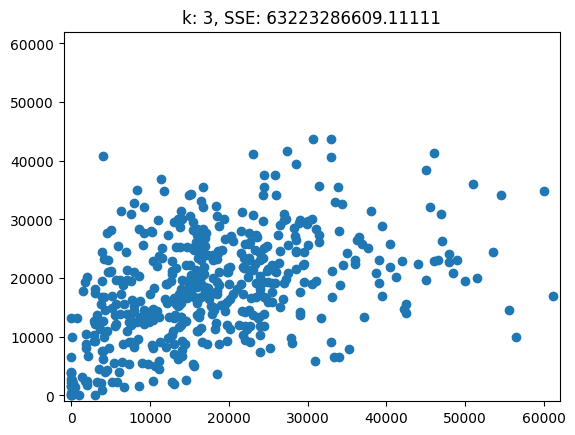

MSE for k= 10 :  110802185.58681999


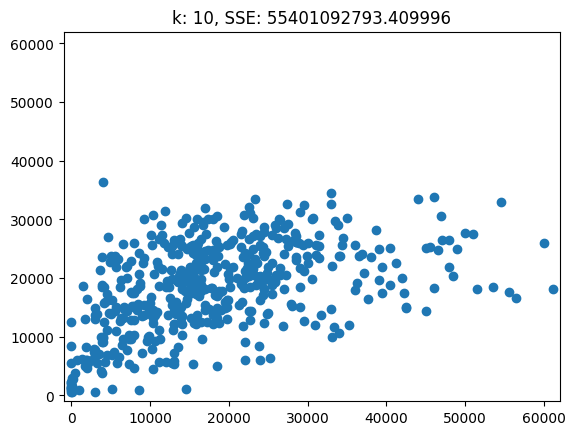

MSE for k= 25 :  103170457.848608


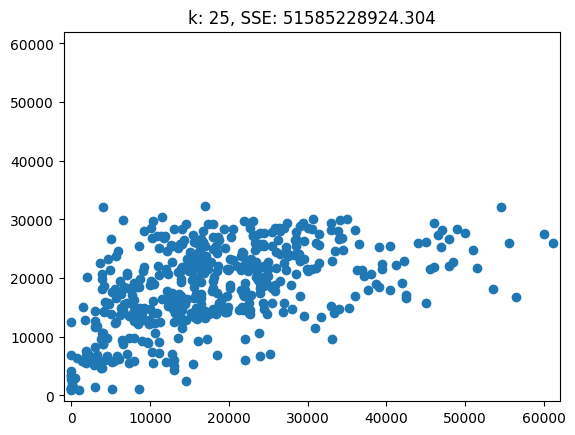

MSE for k= 50 :  99695443.96419598


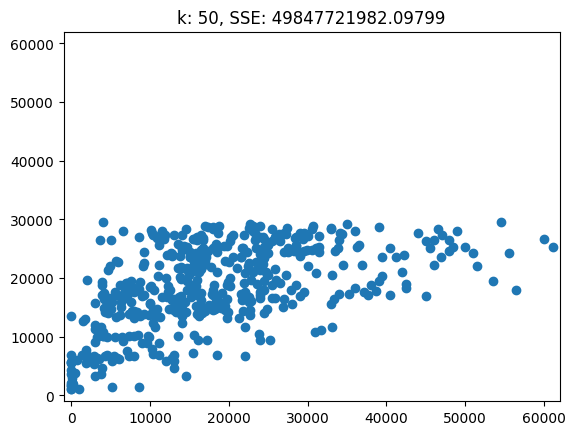

MSE for k= 100 :  98271058.96092059


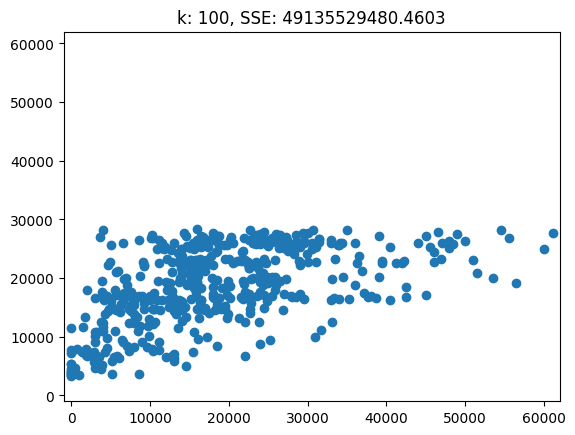

MSE for k= 300 :  100477298.914212


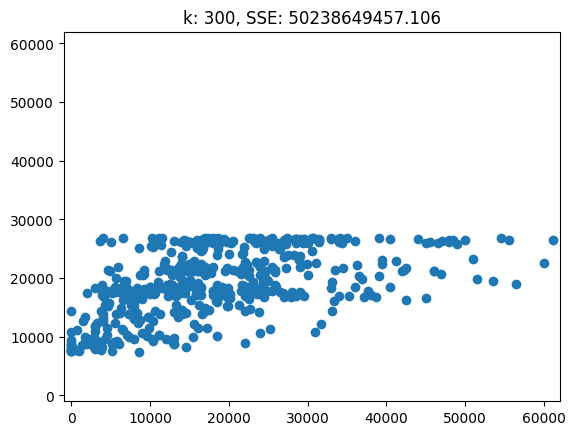

In [8]:
# 4. Use the  𝑘NN algorithm and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300.
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# For each value of 𝑘, compute the mean squared error + scatterplot (test values plotted against predicted values)
for k in [3,10,25,50,100,300]:
  # create/train model
  model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
  # predict target variable
  y_hat = model.predict(X_test)
  # sum of squared errors
  SSE = np.sum( (y_test-y_hat)**2 )
  # MEAN SQUARED ERROR*
  MSE = np.mean((y_test-y_hat)** 2)
  print("MSE for k=",k,": ",MSE)
  # scatterplot*
  plot, axes = plt.subplots()
  plt.scatter(y_test,y_hat) # actual prices plotted against predicted prices
  plt.title('k: '+str(k)+', SSE: '+str(SSE))
  axes.set_ylim(-1000, 62000)
  axes.set_xlim(-1000, 62000)
  plt.show()

**What patterns do you notice as you increase 𝑘 ?**

As k increases, the range of predicted values start to flatten out and the variability of prediction values decrease.

[77]


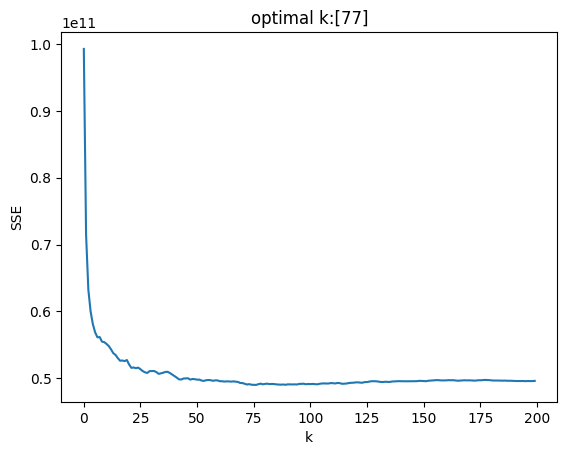

In [10]:
# 5. Determine the optimal k:
k_bar = 200
k_grid = np.arange(1,k_bar) # range of k's
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # SSE

SSE_min = np.min(SSE) # minimum SSE
min_index = np.where(SSE==SSE_min) # index of min SSE
best_k = k_grid[min_index] # optimal k value
print(best_k)

plt.plot(np.arange(0,k_bar),SSE) # plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(best_k))
plt.ylabel('SSE')
plt.show()

**6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied**
(Hint: Use the words "underfitting" and "overfitting"):

In the plots showing predicted vs. actual prices, as k increased, the range of predictions decreased, moving more towards the average value with each plot. Since the optimal k for this model is k=77, the model using k=300 is likely overfitting, meaning it's too complex to explain the relationship between our variables outside of the training set, which is exemplified in our plot. In contrast, the models using k=3, 10, and 25 are probably underfitting, meaning they're too simple to be able to predict the relationship between variables within both the training and testing set of our data. We can observe this in our plots where k is equal to 3, 10, and 25, as the plotted values have a lot more variability and therefore less accuracy.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

In [19]:
# 1. Load the dataset:
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/SEM 7/DS 3001/Assignments/knn/cars_env.csv")
df.head()

,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653


In [20]:
# use footprint, baseline mpg, baseline price, and baseline sales.
df=df[["footprint","baseline mpg","baseline price","baseline sales"]]

# Rename variables:
df = df.rename(columns = {'baseline mpg':'mpg','baseline price':'price','baseline sales':'sales'})
df.head()

# assign predictors/target variable
y = df['sales']
X = df.loc[:, ['footprint','mpg','price'] ]

In [21]:
# A. EDA-- describe tables:
print(df.shape) # 524 rows, 4 columns
print(df.describe()) # 524 observations for each variable

(524, 4)
        footprint         mpg         price          sales
count  524.000000  524.000000  5.240000e+02     524.000000
mean    49.427847   24.676600  5.165181e+04   24764.820399
std      7.915366    6.432016  8.968875e+04   41233.978890
min     36.692097   12.000000  1.178304e+04       1.000000
25%     44.200000   20.209807  2.521127e+04    2163.500000
50%     47.262519   23.782704  3.253602e+04   10157.000000
75%     52.598319   27.713313  5.098088e+04   27427.250000
max     77.500000   65.777800  1.734000e+06  335544.000000


There are no NA's in this data!

[[<Axes: title={'center': 'footprint'}> <Axes: title={'center': 'mpg'}>]
 [<Axes: title={'center': 'price'}> <Axes: title={'center': 'sales'}>]]


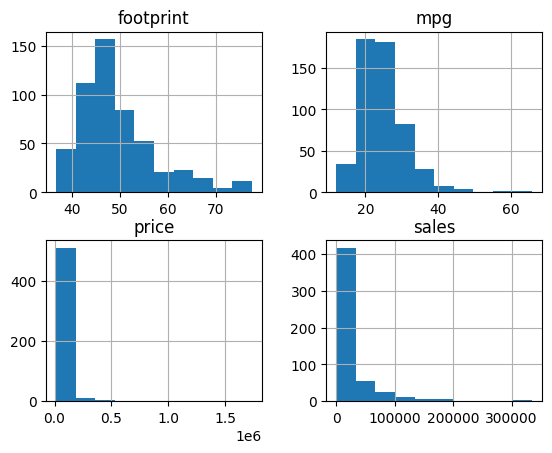

In [22]:
# B. EDA-- histograms:
print(df.hist())

Histograms for 'price' and 'sales' are skewed to the right, meaning most of their values are on the lower end. The histogram for 'footprint' is fairly normally distributed, which the highest frequency of values seeming to fall between 45 and 50. The 'mpg' histogram is also relatively normally distributed, with most of its values grouping between 20-30. Now let's clean the data.

<Axes: xlabel='price', ylabel='Density'>

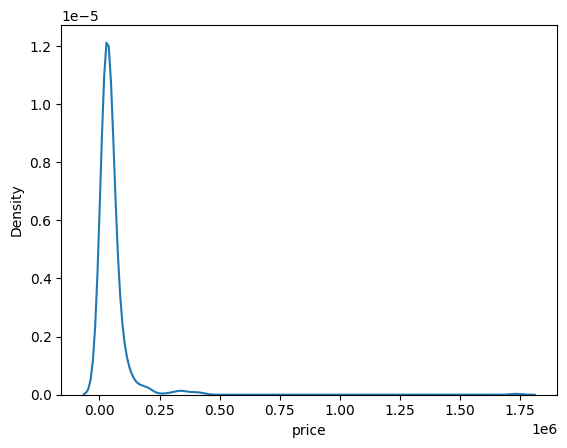

In [23]:
# cleaning 'price' variable
sns.kdeplot(data=df,x='price')

88150.94999999998


<Axes: xlabel='price', ylabel='Density'>

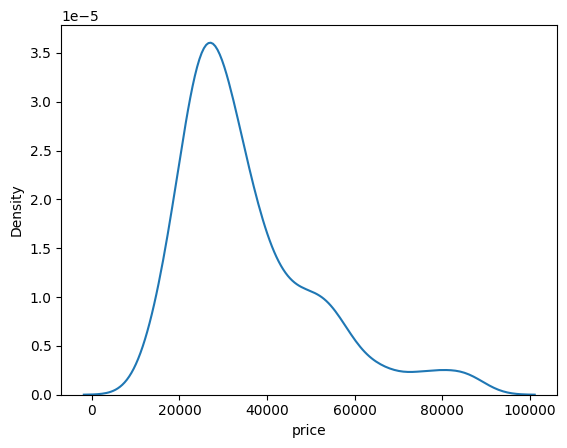

In [24]:
# remove extreme outliers:
q90 = np.quantile( df['price'],.9)
print(q90)
# keep prices below the .90 quantile
keep = df['price'] < q90
# locator function
df = df.loc[keep,:]
df.describe()
sns.kdeplot(data=df,x='price')

Because the vast majority of values are concentrated towards the lower end of the range of prices, I removed the top 10% because the most expensive cars aren't as representative of our data. By making this change, the data looks a lot more normally distributed.

<Axes: xlabel='sales', ylabel='Density'>

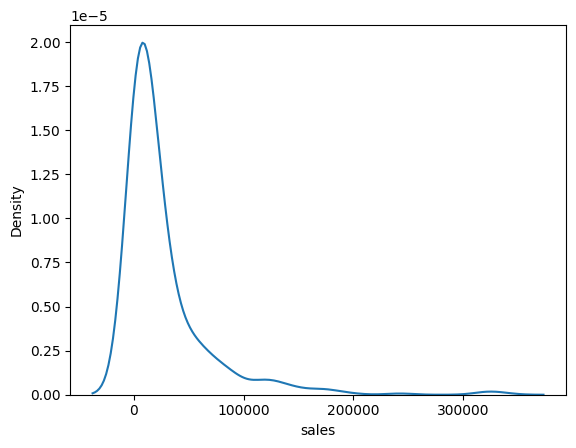

In [25]:
# cleaning 'sales' variable
sns.kdeplot(data=df,x='sales')

70805.0


<Axes: xlabel='sales', ylabel='Density'>

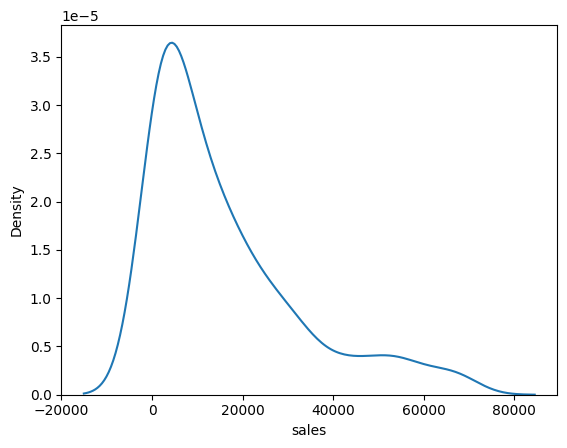

In [26]:
# remove extreme outliers:
q90 = np.quantile( df['sales'],.9)
print(q90)
# keep prices below the .90 quantile
keep = df['sales'] < q90
# locator function
df = df.loc[keep,:]
df.describe()
sns.kdeplot(data=df,x='sales')

While it's still not perfectly normally distributed, removing the top 10% of values for sales allowed for the range of values to be more appropriate for our actual data, as only a few cars were in this top range.

[[<Axes: title={'center': 'footprint'}> <Axes: title={'center': 'mpg'}>]
 [<Axes: title={'center': 'price'}> <Axes: title={'center': 'sales'}>]]


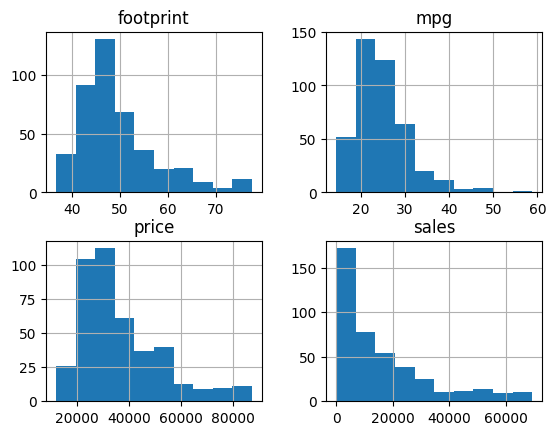

In [27]:
# EDA-- histograms pt. 2:
print(df.hist())

Looking at our new histograms, we can see that price is now fairly normally distributed with the highest frequency value being around $30,000, while the values for sales are still skewed to the right. Let's try plotting sales against price to see if there's anything noticeable.

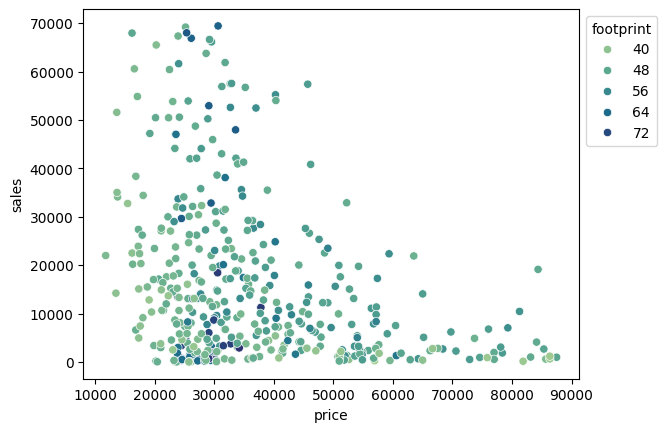

In [28]:
# C. EDA-- scatterplots
# sales against price
sp_plot = sns.scatterplot(data=df,x='price',y='sales',hue='footprint',
                           palette = 'crest')
sns.move_legend(sp_plot, "upper left", bbox_to_anchor=(1, 1))

From this scatterplot, we can see that the data is skewed to the right, with most values concentrated between 20000 and 45000 dollars for the price variable and between 0 and 40000 sales, showcasing a floor effect. Different carbon footprint levels are also concentrated near the minimum range of the data, notably with the lower carbon footprint values appearing more frequently towards the bottom of the price and sales scales.

In [29]:
# 2. Maxmin normalize footprint, mpg, and price:
    # (features/covariates 'x')
# Note: sales is our target/outcome variable 'y'

def maxmin(x):
    var = (x-min(x))/(max(x)-min(x))
    return var

df['footprint'] = maxmin(df['footprint'])
df['mpg'] = maxmin(df['mpg'])
df['price'] = maxmin(df['price'])

**Does it make sense to normalize  𝑦 ?**

It does not make sense to normalize y because it is the variable we are trying to predict. Changing its scale would change the interpretation of our results, which may lead to confusion. Additionally, when fitting this model, we are not looking at distances related to the target variable 'y'.

In [30]:
# 3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=300) # train-test split

[134]


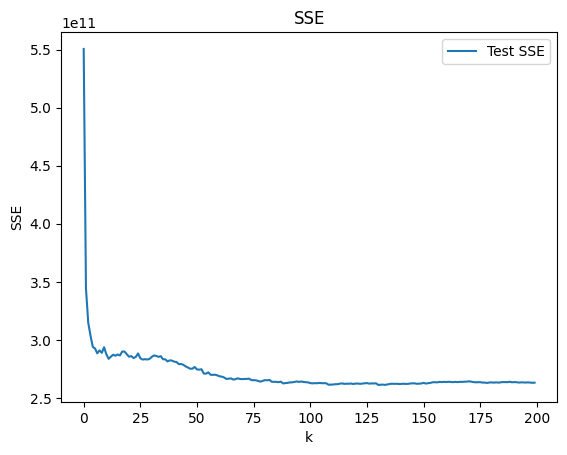

In [37]:
# 4. Finding the best k (the k w/ lowest SSE)
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Evalute SSE on the test set for a reasonable range of values of k (2 to 150):
k_bar = 200 # number of k's to iterate through
SSE = np.zeros(k_bar) # SSE- testing
SSE_on_train = np.zeros(k_bar) # SSE- training

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # create model
    fitted_model = model.fit(X_train,y_train) # train the model
    y_hat = fitted_model.predict(X_test) # predict values for testing
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # SSE for testing
    y_hat = fitted_model.predict(X_train) # predict values for training
    SSE_on_train[k] = np.sum( (y_train-y_hat)**2 ) # SSE for training

# get lowest recorded SSE (optimal k)
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
optimal_k = min_index[0]+1 # optimal value of k is index+1 to make interpretation easier
print(optimal_k)

# Plot SSE by k
plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

**Using all three covariates (footprint, mpg, price), what's the best *k* to use?**

The optimal *k* is *k*=124.

**What SSE is achieved on the test set?**

The SSE for the test set when *k*=124 is about 1.20, indicating lower levels of error.

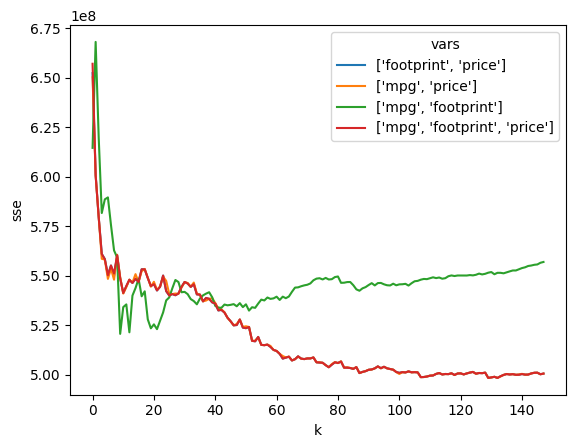

498419143.79717386
498442535.6442982
520679044.4801958
498419143.79717386


In [38]:
# 5. Do same thing again for each pair of variables--
# split-train test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=10000) # train-test split

# footprint/price
vars1 = ['footprint','price']
# mpg/price
vars2 = ['mpg','price']
# mpg/footprint
vars3 = ['mpg','footprint']
# all 3 variables
vars4 = ['mpg','footprint', 'price']

kgrid = np.arange(2,150)
N = len(y)

SSE_results = []
y_hat_results = []
for var_list in [vars1, vars2, vars3, vars4]:
    X_train_1 = X_train.loc[:,var_list ]
    X_test_1 = X_test.loc[:,var_list]
    SSE = np.zeros(len(kgrid))
    for k in range(len(kgrid)):
        model = KNeighborsRegressor(n_neighbors=kgrid[k]) # model
        fitted_model = model.fit(X_train_1,y_train) # training model
        y_hat = fitted_model.predict(X_test_1) # predicting test values
        y_hat_results.append(y_hat)
        SSE_results.append( {'sse':np.sum( (y_test-y_hat)**2)/N,
                            'vars':str(var_list),
                            'k':k} )
gdf = pd.DataFrame.from_dict(SSE_results)

sns.lineplot(y='sse',x='k',data=gdf,hue='vars')
plt.show()

print( np.min( gdf.loc[gdf['vars'] == str(vars1),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars2),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars3),'sse']))
print( np.min( gdf.loc[gdf['vars'] == str(vars4),'sse']))
# could not figure out how to get the first vars pair to show on the graph, but obtained the SSE

**6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.**

The set of variables 'footprint' and 'price' from the previous sections performs the best in terms of predicting sales because it has the lowest SSE out of all the different pairs (equal to SSE for all 3 predictors).

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.